In [106]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [107]:
csv_file_path = os.getenv('HOME') + '/data/data/bike-sharing-demand/train.csv'

dataset = pd.read_csv(csv_file_path)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [108]:
# datetime 컬럼을 DateTime 자료형으로 변환
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 생성
dataset['year'] = dataset['datetime'].dt.year
dataset['month'] = dataset['datetime'].dt.month
dataset['day'] = dataset['datetime'].dt.day
dataset['hour'] = dataset['datetime'].dt.hour
dataset['minute'] = dataset['datetime'].dt.minute
dataset['second'] = dataset['datetime'].dt.second

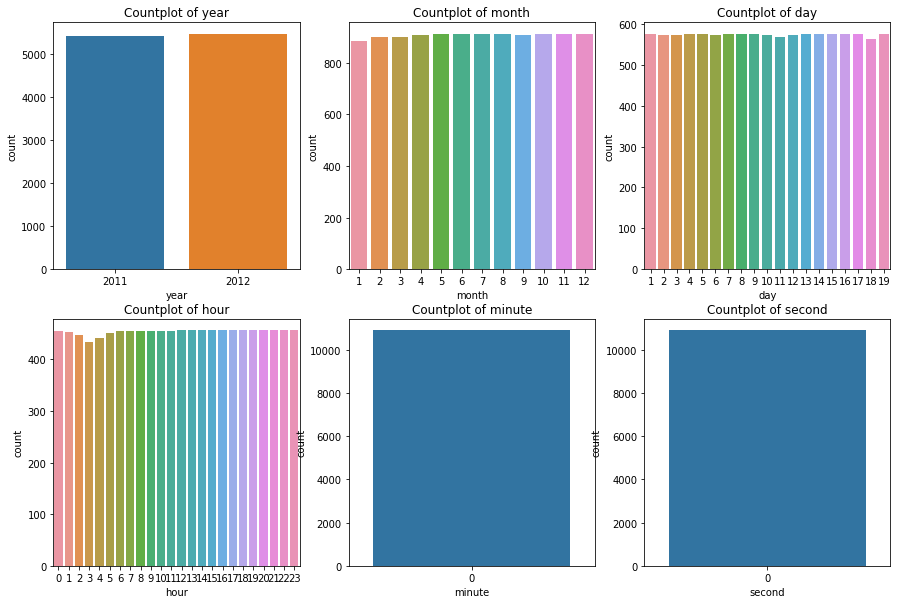

In [109]:
columns = ['year', 'month', 'day', 'hour', 'minute', 'second']

# subplot 설정
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=dataset, x=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

plt.show()

<AxesSubplot:>

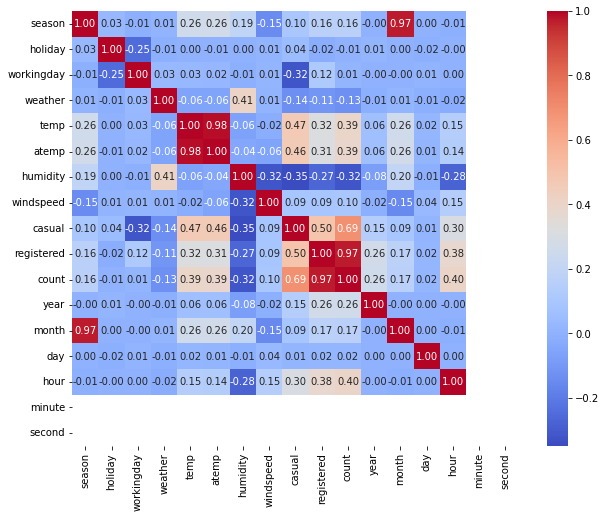

In [110]:
# 상관관계 계산
correlation = dataset.corr()

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

In [113]:
# casual과 registered는 정답 레이블의 일부이므로 예측에 의미가 없는 값이다
# minute과 second는 모두 0으로 분포가 몰려 있어서 예측에 의미가 없다
# month와 season, temp와 atemp는 너무 비슷하므로 제외

X = dataset[['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed' ,'year', 'month', 'day' ,'hour']]
y = dataset['count']

In [114]:
# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# LinearRegression 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [116]:
# 예측값 출력
y_pred = model.predict(X_test)
dataset['pred_count'] = model.predict(X)

print("예측값:", y_pred)
print("실제값:", y_test.values)

예측값: [242.13770388  46.45494126 205.6465447  ... 306.21474675  41.57450981
 241.66462584]
실제값: [127  13 163 ... 509   5 239]


In [117]:
# 손실함수 값 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 141.29700097944752


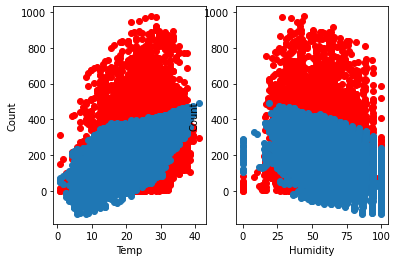

In [118]:
plt.subplot(1, 2, 1)
plt.scatter(dataset['temp'], dataset['count'] ,color ="red")
plt.scatter(dataset['temp'], dataset['pred_count'])
plt.xlabel('Temp')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
plt.scatter(dataset['humidity'], dataset['count'] ,color ="red")
plt.scatter(dataset['humidity'], dataset['pred_count'])
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()